In [1]:
import matplotlib
from pylab import *
import networkx as nx
import random as rd
import numpy as np

In [2]:
def initialize(n, p_e, p_i):
    global g
    g = nx.erdos_renyi_graph(n = n, p = p_e)
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < p_i else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)
    
def update(p_i, p_r):
    global g
    for a in g.nodes:
        if g.nodes[a]['state'] == 0:
            b = rd.choice(list(g.neighbors(a)))
            if g.nodes[b]['state'] == 1:
                g.nodes[a]['state'] = 1 if random() < p_i else 0
        else:
            g.nodes[a]['state'] = 0 if random() < p_r else 1

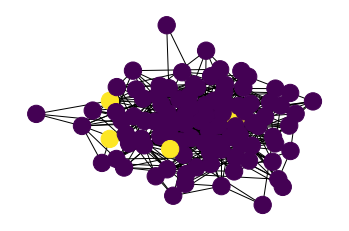

In [3]:
n, p_e, p_i, p_r = 100, 0.1, 0.5, 0.5

initialize(n, p_e, p_i)
for i in range(10):
    update(p_i, p_r)
observe()

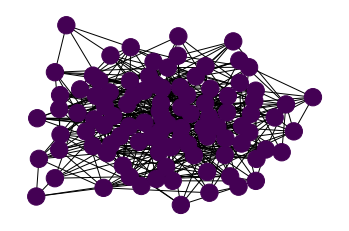

In [4]:
n, p_e, p_i, p_r = 100, 0.1, 0.04, 0.5

initialize(n, p_e, p_i)
for i in range(10):
    update(p_i, p_r)
observe()

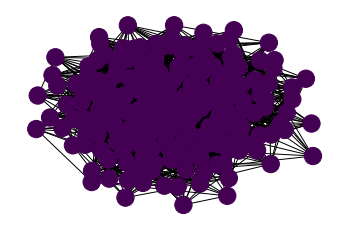

In [5]:
n, p_e, p_i, p_r = 200, 0.1, 0.04, 0.5

initialize(n, p_e, p_i)
for i in range(10):
    update(p_i, p_r)
observe()

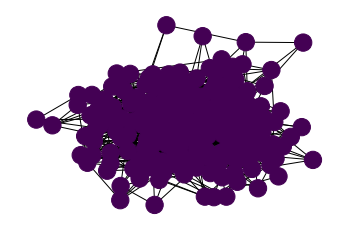

In [6]:
n, p_e, p_i, p_r = 200, 0.05, 0.04, 0.5

initialize(n, p_e, p_i)
for i in range(10):
    update(p_i, p_r)
observe()

In [32]:
n = 1000
ne = 40

er = nx.erdos_renyi_graph(n=n, p=ne/n)
ws = nx.watts_strogatz_graph(n=n, k=ne, p=rd.random())
ba = nx.barabasi_albert_graph(n=n, m=ne-20)

print(np.mean([er.degree[i] for i in range(len(er.nodes))]))
print(np.mean([ws.degree[i] for i in range(len(ws.nodes))]))
print(np.mean([ba.degree[i] for i in range(len(ba.nodes))]))


40.066
40.0
39.2


In [33]:
def count_more_friends(graph):
    n_deg = {i:[graph.degree[j] for j in graph.neighbors(i)] for i in range(len(graph.nodes))}

    c=0

    for i,j in n_deg.items():
        if graph.degree[i] > np.mean(j):
            c+=1

    return c/len(graph.nodes)

In [34]:
print(count_more_friends(er))
print(count_more_friends(ws))
print(count_more_friends(ba))

0.432
0.468
0.132


In [36]:
print(np.mean([np.mean([er.degree[j] for j in er.neighbors(i)]) for i in range(len(er.nodes))]))
print(np.mean([np.mean([ws.degree[j] for j in ws.neighbors(i)]) for i in range(len(ws.nodes))]))
print(np.mean([np.mean([ba.degree[j] for j in ba.neighbors(i)]) for i in range(len(ba.nodes))]))

41.060559739453545
40.19054963160555
62.09178085014448
